<a href="https://colab.research.google.com/github/AyoubSah/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
import numpy as np

# Create two sample arrays
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([2, 4, 6])

# Perform a left join-like operation
result = np.zeros_like(array1)
mask = np.in1d(array1, array2, assume_unique=True)
result[mask] = array1[mask]

print(result)


[0 2 0 4 0]


In [ ]:
data = pd.read_csv('winequality-red.csv')
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [ ]:
import csv
import os

filename = 'winequality-red.csv'

with open(filename, 'r') as infile, open('winequaity.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter=';')
    writer = csv.writer(outfile, delimiter=',')
    for row in reader:
        writer.writerow(row)

# Replace the original file with the new file
os.replace('winequality.csv', filename)

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv('winequaity.csv')
data.head(10)
df = data.copy()

In [ ]:
data.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [ ]:
for col in data.columns:
  print(f"{col}: --- {data[col].isna().sum()}")

fixed acidity: --- 0
volatile acidity: --- 0
citric acid: --- 0
residual sugar: --- 0
chlorides: --- 0
free sulfur dioxide: --- 0
total sulfur dioxide: --- 0
density: --- 0
pH: --- 0
sulphates: --- 0
alcohol: --- 0
quality: --- 0


In [ ]:
#df = data.insert(0, 'Ones', 1)
data.head()
data = (data - data.mean()) / data.std()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,-0.787576
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0.450707
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0.450707
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,-0.787576


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
Y

array([-0.78757625, -0.78757625, -0.78757625, ...,  0.45070735,
       -0.78757625,  0.45070735])

In [ ]:
x = df[:, :-1]
y = df[:, -1]
y

array([-0.78782264, -0.78782264, -0.78782264, ...,  0.45084835,
       -0.78782264,  0.45084835])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Linear Model - MSE: {mse}, RMSE: {rmse}, R^2: {r2}")

Linear Model - MSE: 0.6309600637331627, RMSE: 0.7943299463907695, R^2: 0.3513885332505242


In [ ]:
models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet(),
         'Poly': make_pipeline(PolynomialFeatures(1), LinearRegression())}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, RMSE: {rmse}, R^2: {r2}, Accuracy: {model.score(X_train, y_train) * 100}")

LinearRegression - MSE: 0.6309600637331627, RMSE: 0.7943299463907695, R^2: 0.3513885332505242, Accuracy: 36.11982441321319
Ridge - MSE: 0.6309409588309859, RMSE: 0.7943179205022293, R^2: 0.35140817262127877, Accuracy: 36.119787021524886
Lasso - MSE: 0.976141489703161, RMSE: 0.9879987296060461, R^2: -0.0034495046252931427, Accuracy: 0.0
ElasticNet - MSE: 0.976141489703161, RMSE: 0.9879987296060461, R^2: -0.0034495046252931427, Accuracy: 0.0
Poly - MSE: 0.6309600637331627, RMSE: 0.7943299463907695, R^2: 0.3513885332505242, Accuracy: 36.11982441321319


In [ ]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    deleted = []
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    deleted.append(j)
    print(regressor_OLS.summary())
    return x, regressor_OLS.params, deleted

In [ ]:
SL = 0.05
X_opt = X_train
X_opt

array([[ 0.16107692, -1.71963208,  0.45714436, ...,  1.02947179,
         1.25019886,  0.54162988],
       [ 2.40174566, -0.37887771,  1.84360683, ..., -2.0805817 ,
         1.25019886, -0.20930812],
       [-0.6432657 ,  0.06804042, -0.0050098 , ...,  0.51112954,
         0.30598963,  0.54162988],
       ...,
       [-0.6432657 ,  0.51495855, -1.08336951, ...,  1.28864292,
        -0.69723268, -0.86637886],
       [-0.24109439, -1.83136161,  0.4057939 , ...,  0.05758008,
         0.83710732,  1.38643512],
       [-1.44760832, -1.32857872, -0.05636026, ...,  0.51112954,
        -0.69723268,  2.8883111 ]])

In [ ]:
X_modeled, beta, to_delete = backwardElimination(X_train, SL)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.360
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              89.35
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                   3.01e-103
Time:                        01:15:45   Log-Likelihood:                         -1344.2
No. Observations:                1119   AIC:                                      2702.
Df Residuals:                    1112   BIC:                                      2738.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_pred = X_modeled.dot(beta.T)

print((.5 / len(X_modeled)) * (((y_pred - y_train) ** 2).sum()))
computeCost(X_modeled, y_train, beta)

0.3235151032235232


0.3235151032235232

In [ ]:
def computeCost(X, y, theta):
    return np.sum(np.power((model(X, theta) - y), 2)) * (.5 / len(X))

In [ ]:
def model(X, theta):
  return X.dot(theta)

In [ ]:
def grad(X, y, theta):
  return (1 / len(y)) * X.T.dot(model(X, theta) - y)

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(0, iters):
      theta = theta - alpha * grad(X, y, theta)
      cost[i] = computeCost(X, y, theta)
    return theta, cost

In [ ]:
alpha = 0.01
iters = 100
theta = np.matrix(np.zeros((X_train.shape[1], 1)))
theta.shape

(11, 1)

In [ ]:
g, cost = gradientDescent(X_train, y_train, theta, alpha, iters)
print('g = ' , g)
print('cost = ' , cost[-1] )
print('computeCost = ' , computeCost(X_train, y_train, g))

g =  [[-2.74804991e-03  1.28141529e-03  1.28141529e-03 ...  1.28141529e-03
  -2.74804991e-03 -7.33317307e-04]
 [ 2.93297752e-02 -1.36764702e-02 -1.36764702e-02 ... -1.36764702e-02
   2.93297752e-02  7.82665254e-03]
 [ 4.17773161e-03 -1.94807567e-03 -1.94807567e-03 ... -1.94807567e-03
   4.17773161e-03  1.11482797e-03]
 ...
 [ 2.30006180e-02 -1.07251850e-02 -1.07251850e-02 ... -1.07251850e-02
   2.30006180e-02  6.13771649e-03]
 [ 7.48836338e-03 -3.49182282e-03 -3.49182282e-03 ... -3.49182282e-03
   7.48836338e-03  1.99827028e-03]
 [-3.97425680e-05  1.85319540e-05  1.85319540e-05 ...  1.85319540e-05
  -3.97425680e-05 -1.06053070e-05]]
cost =  564.7270218354698
computeCost =  564.7270218354698


In [ ]:
pred = model(X_test, theta)

In [ ]:
computeCost(X_test, y_test, theta)

233.86301699089435

In [ ]:
from sklearn import svm
regressor = svm.SVR()
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
s=regressor.score(X_test, y_test)
print(s)

scores = cross_val_score(regressor ,X_test, y_test)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))


0.40402712202108115
Accuracy: 0.33 (+/- 0.04)


3


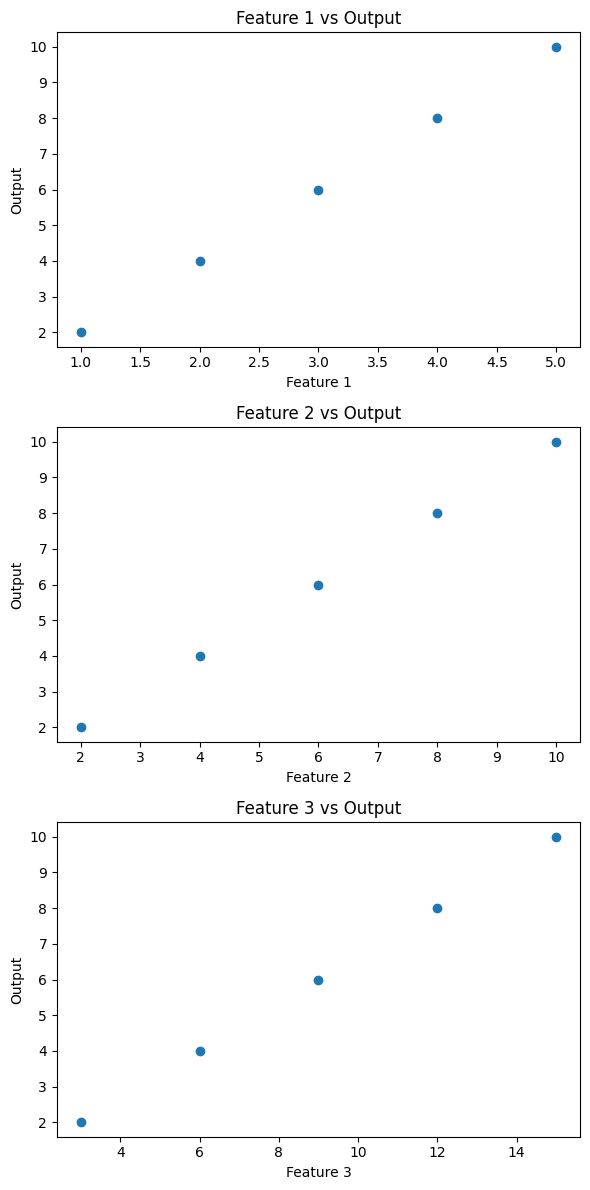

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
features = np.array([[1, 2, 3, 4, 5],
                     [2, 4, 6, 8, 10],
                     [3, 6, 9, 12, 15]])
output = np.array([2, 4, 6, 8, 10])

num_features = features.shape[0]
print(num_features)
fig, axs = plt.subplots(num_features, 1, figsize=(6, 4 * num_features))

for i in range(num_features):
    axs[i].plot(features[i], output, 'o')
    axs[i].set_xlabel('Feature {}'.format(i + 1))
    axs[i].set_ylabel('Output')
    axs[i].set_title('Feature {} vs Output'.format(i + 1))

plt.tight_layout()
plt.show()
